<h1> 📊 Sentiment Analysis of COVID-19 Tweets </h1>
<h4 style="color:#555; margin-top:-8px;">
Using VADER and TF-IDF + Logistic Regression/h4>

<hr style="border:1px solid #ddd;">


This dataset consists of COVID-19 related Twitter data used for sentiment and social network analysis. It contains tweet text, user metadata, hashtags, and other fields that support NLP, classification, and temporal/spatial analysis of public discourse during the pandemic. Common tasks include sentiment classification into negative/neutral/positive categories and exploratory analysis of tweet behavior.

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>  📂
    Dataset Overview </h3>
</div>

The file covid19_tweets.csv contains Twitter data collected around the COVID-19 pandemic for social network analysis, sentiment analysis, and exploration of public discourse.

**Competition:** T🦠COVID-19: Sentiment Analysis & Social Networks

**File Used:** `covid_tweets.csv`  

**Dataset Source:** Kaggle  
https://www.kaggle.com/code/andradaolteanu/covid-19-sentiment-analysis-social-networks/

| Column                                    | Description                                                 |
| ----------------------------------------- | ----------------------------------------------------------- |
| `user_name`                               | User’s Twitter username.                                    |
| `user_location`                           | Free-text user location.                                    |
| `user_description`                        | User’s profile description text.                            |
| `user_created`                            | Date/time when the user account was created.                |
| `user_followers`                          | Number of followers the user has.                           |
| `user_friends`                            | Number of accounts the user follows.                        |
| `user_favourites`                         | Number of tweets the user has liked.                        |
| `user_verified`                           | Whether the user’s account is verified (`True`/`False`).    |
| `date`                                    | Date/time the tweet was posted.                             |
| `text`                                    | Raw tweet content (tweet text).                             |
| `hashtags`                                | Hashtags extracted from the tweet.                          |
| `source`                                  | Twitter client/source (e.g., iPhone, Android, Web).         |
| `is_retweet`                              | Whether the tweet is a retweet.                             |
| `processed_tweet`                         | Cleaned tweet text (used for NLP).                          |


**Importing the Required Files**

In [9]:
# Core
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
import json 
# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
# ML
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
#Others
from collections import Counter
from IPython.display import display, Markdown

In [5]:
file = ".data/covid19_tweets.csv"

In [10]:
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict

In [13]:
df = pd.read_csv(file,encoding="latin-1")
df .head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,áá¥â»Õ¬ê Ï®,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile ðºð¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,ðï¸Official Twitter handle of Department o...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Statistics</h3>
</div>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [15]:
df.isna().sum().sort_values(ascending=False).head(20)

hashtags            51334
user_location       36771
user_description    10286
source                 77
user_name               0
user_followers          0
user_created            0
user_friends            0
user_favourites         0
date                    0
user_verified           0
text                    0
is_retweet              0
dtype: int64

In [16]:
df.describe(include="all").T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_name,179108,92276,GlobalPandemic.NET,679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_location,142337,26920,India,3741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_description,168822,89200,Breaking News & Critical Information to SURVIV...,679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_created,179108,93708,2010-07-13 21:58:05,679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_followers,179108.0,NaN,NaN,NaN,109055.528184,841467.000703,0.0,172.0,992.0,5284.0,49442559.0
user_friends,179108.0,NaN,NaN,NaN,2121.701566,9162.553072,0.0,148.0,542.0,1725.25,497363.0
user_favourites,179108.0,NaN,NaN,NaN,14444.105663,44522.698958,0.0,206.0,1791.0,9388.0,2047197.0
user_verified,179108,2,False,156013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,179108,136611,2020-08-06 16:00:00,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,179108,178683,"The incompetence of this administration, and t...",13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> 🧹Data Cleaning & Preprocessing</h3>
</div>

In [17]:
tweet = "text"
df_clean = df.copy()
df_clean[tweet] = df_clean[tweet].astype(str)
df_clean[[tweet]].head()

,text
0,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel #CoronaVirus...


In [20]:
def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub(r'@[^\s]+','',tweet)                              # Removes usernames
    tweet = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)   # Remove URLs
    tweet = re.sub(r"\d+"," ", str(tweet))                           # Removes all digits
    tweet = re.sub(r'&quot;'," ", tweet)                               # Remove (&quot;)
   # tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space
    return tweet

In [21]:
df_clean['processed_tweet'] = np.vectorize(process_tweet)(df_clean[tweet])
df_clean.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,processed_tweet
0,áá¥â»Õ¬ê Ï®,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,if smelled the scent of hand sanitizers today ...
1,Tom Basile ðºð¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,hey and wouldn it have made more sense to have...
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,trump never once claimed covid was hoax we al...
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,the one gift covid has give me is an apprecia...
4,DIPR-J&K,Jammu and Kashmir,ðï¸Official Twitter handle of Department o...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,july media bulletin on novel coronavirusupdat...


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Expolatory Data Analysis</h3>
</div>

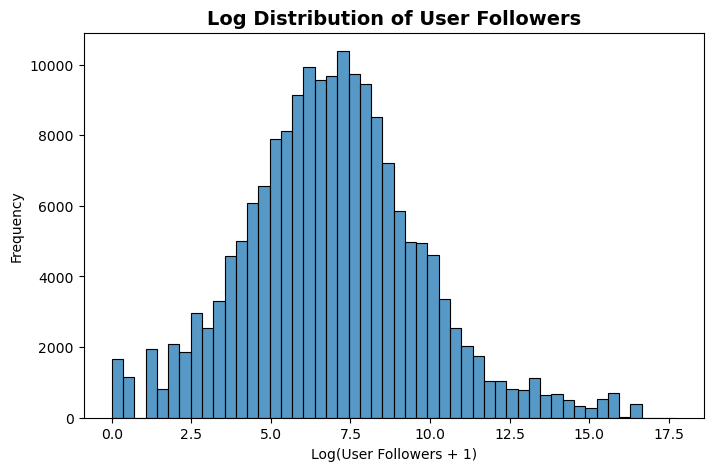

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["user_followers"]), bins=50)
plt.title("Log Distribution of User Followers", fontsize=14, fontweight='bold')
plt.xlabel("Log(User Followers + 1)")
plt.ylabel("Frequency")
plt.show()

In [23]:
verified_users = df_clean['user_verified'].value_counts()

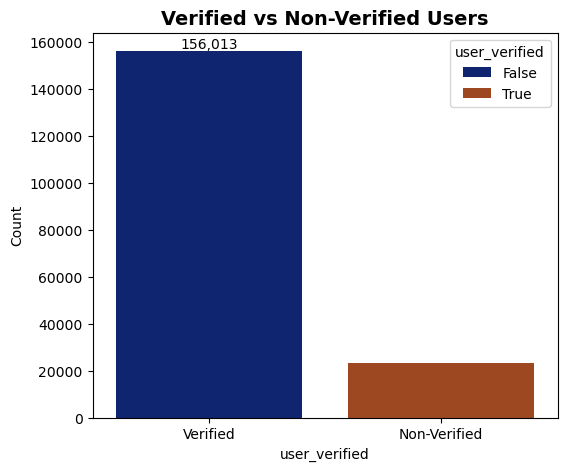

In [24]:
plt.figure(figsize=(6,5))
ax = sns.barplot(x=verified_users.index,y=verified_users.values,hue=verified_users.index,palette="dark")
plt.xticks([0,1], ['Verified', 'Non-Verified'])
plt.title("Verified vs Non-Verified Users", fontsize=14, fontweight='bold')
ax.bar_label(ax.containers[0],fmt='{:,.0f}')
plt.ylabel("Count")
plt.show()

**Tweet by User Locations**

In [53]:
COUNTRY_MAP = {
    "USA": [
        "usa", "united states", "america",
        "new york", "nyc", "washington dc",
        "los angeles", "california", "texas",
        "atlanta", "chicago"
    ],
    "United Kingdom": [
        "uk", "united kingdom", "england", "london"
    ],
    "India": [
        "india", "new delhi", "delhi", "mumbai", "bombay"
    ],
    "Canada": ["canada"],
    "Australia": ["australia"],
    "South Africa": ["south africa", "johannesburg"],
    "Nigeria": ["nigeria", "lagos"],
    "Kenya": ["kenya", "nairobi"],
    "Switzerland": ["switzerland"]
}

def clean_location(loc):
    if pd.isna(loc):
        return "Unknown"

    loc = str(loc).strip().lower()
    loc = re.sub(r'[^\w\s,]', '', loc)

    if loc in ["", "nan", "none", "null", "worldwide", "global", "earth"]:
        return "Unknown"

    for country, keywords in COUNTRY_MAP.items():
        for keyword in keywords:
            if keyword in loc:
                return country

    return "Unknown"

In [48]:
df["location_grouped"] = df["user_location"].apply(clean_location)

In [51]:
top_locations = df["location_grouped"].value_counts()

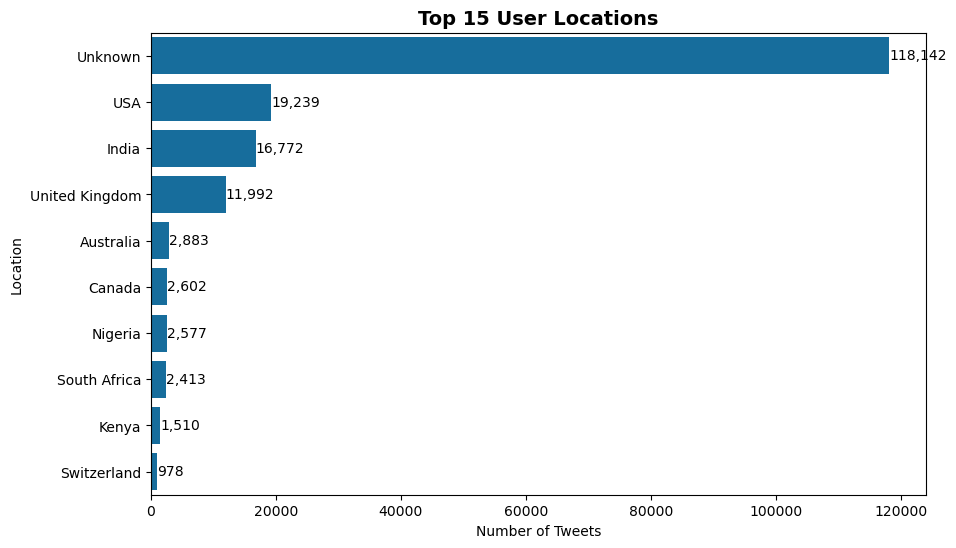

In [52]:
sns.set_palette("colorblind")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_locations.values,y=top_locations.index)
plt.title("Top 15 User Locations", fontsize=14, fontweight='bold')
plt.xlabel("Number of Tweets")
plt.ylabel("Location")
ax.bar_label(ax.containers[0],fmt='{:,.0f}')
plt.show()

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">

**Analysis**: 
Top countries was India, UK and USA if we were to ignore the unknown values.
</div>

In [259]:
hashtags = df_clean['hashtags'].copy()
hashtags.dropna()

2                                             ['COVID19']
3                                             ['COVID19']
4                       ['CoronaVirusUpdates', 'COVID19']
5                              ['coronavirus', 'covid19']
6                               ['COVID19', 'Recruiting']
                               ...                       
179101    ['nurses', 'COVID19', 'coronavirus', 'schools']
179102                                        ['covid19']
179103                                      ['WearAMask']
179104                                        ['COVID19']
179106                                        ['COVID19']
Name: hashtags, Length: 127774, dtype: object

In [315]:
def clean_hashtags_with_hash(series):
    
    cleaned_words = []
    
    for text in series.dropna():
        text = str(text).lower()
        text = re.sub(r"[^a-z0-9\s]", " ", text)
        words = text.split()
        cleaned_words.extend(words)
    
    # Add #
    cleaned_words = [f"#{word}" for word in cleaned_words]
    
    return " ".join(cleaned_words)

In [316]:
cleaned_hashtags_text = clean_hashtags_with_hash(df_clean["hashtags"])
hashtags_with_hash = " ".join(
    f"#{word}" for word in cleaned_hashtags_text.split()
)

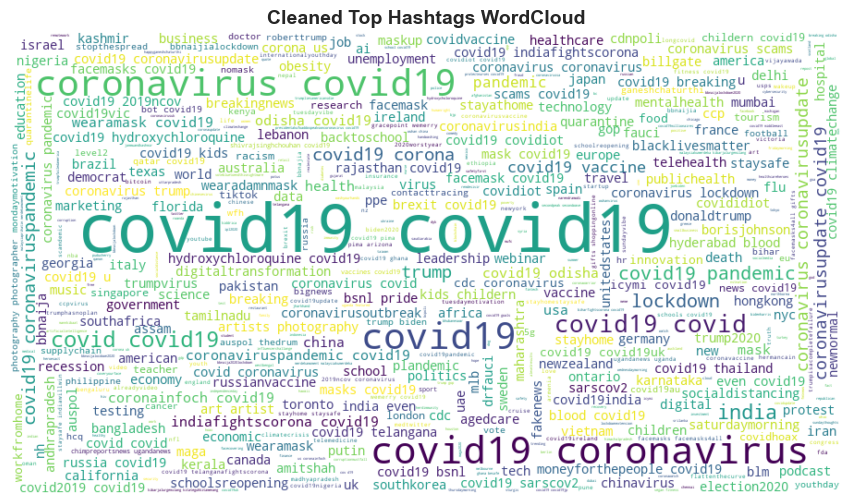

In [317]:
wordcloud = WordCloud( width=900,height=500, background_color="white",colormap="viridis",max_words=500).generate(hashtags_with_hash)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Cleaned Top Hashtags WordCloud", fontsize=14, fontweight='bold')
plt.show()

**Most Common Words**

In [297]:
def remove_duplicate_words(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    words = text.split()
    # Remove duplicates but preserve order
    unique_words = list(dict.fromkeys(words))
    return " ".join(unique_words)
    

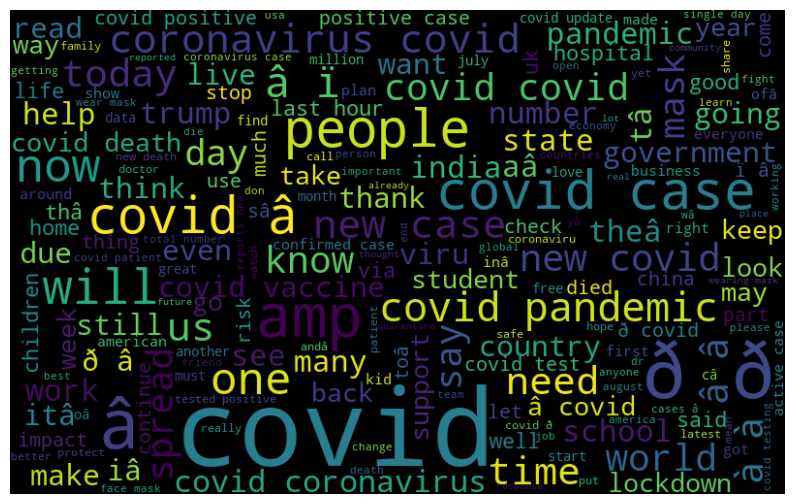

In [299]:
all_words = ' '.join([text for text in df_clean['processed_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Feature Engineering using VADER Sentiment Scores</h3>
</div>

In [125]:
analyzer = SentimentIntensityAnalyzer()
scores = df_clean["processed_tweet"].apply(analyzer.polarity_scores)
scores_df = pd.DataFrame(scores.tolist(), index=df_clean.index)  # neg/neu/pos/compound
df_clean = pd.concat([df_clean, scores_df], axis=1)
df_clean[["processed_tweet", "neg", "neu", "pos", "compound"]].head()

,processed_tweet,neg,neu,pos,compound
0,if smelled the scent of hand sanitizers today ...,0.000,0.856,0.144,0.4939
1,hey and wouldn it have made more sense to have...,0.071,0.812,0.117,0.2263
2,trump never once claimed covid was hoax we al...,0.139,0.861,0.000,-0.2732
3,the one gift covid has give me is an apprecia...,0.000,0.733,0.267,0.7351
4,july media bulletin on novel coronavirusupdat...,0.000,0.723,0.277,0.3182


In [127]:
def getAnalysis(score):
    if score < 0:
      return 'negative'
    elif score == 0:
      return 'neutral'
    else:
      return 'positive'

df_clean['sentiment'] = df_clean['compound'].apply(getAnalysis)
# Show the dataframe
df_clean[['processed_tweet', 'neg', 'neu', 'pos', 'compound','sentiment']].head()

,processed_tweet,neg,neu,pos,compound,sentiment
0,if smelled the scent of hand sanitizers today ...,0.000,0.856,0.144,0.4939,positive
1,hey and wouldn it have made more sense to have...,0.071,0.812,0.117,0.2263,positive
2,trump never once claimed covid was hoax we al...,0.139,0.861,0.000,-0.2732,negative
3,the one gift covid has give me is an apprecia...,0.000,0.733,0.267,0.7351,positive
4,july media bulletin on novel coronavirusupdat...,0.000,0.723,0.277,0.3182,positive


In [129]:
slices = [(df_clean['sentiment'] == 'negative').sum(), (df_clean['sentiment'] == 'positive').sum(), (df_clean['sentiment'] == 'neutral').sum()]
slices

[np.int64(50025), np.int64(70677), np.int64(58406)]

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">

**Analysis**: We can see that there are more positive words and neutral than negative words for Covid Tweets.
</div>

### Distribution by Sentiment

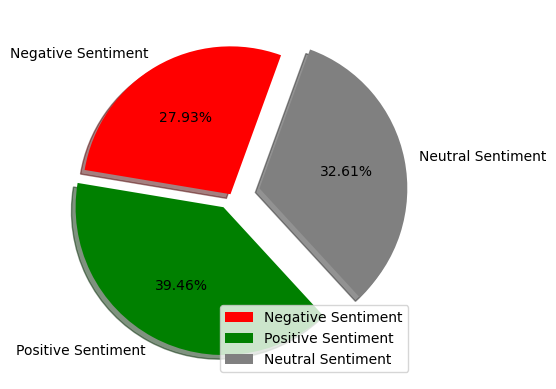

In [130]:
sentiments = ['Negative Sentiment','Positive Sentiment', 'Neutral Sentiment']
colors = ['red','green','gray']
plt.pie(slices, labels = sentiments, colors=colors, startangle=70, shadow = True,explode = (0, 0.1,0.2), radius = 1, autopct = '%1.2f%%')
plt.legend()
plt.show()

### Segregating the top words in each sentiment

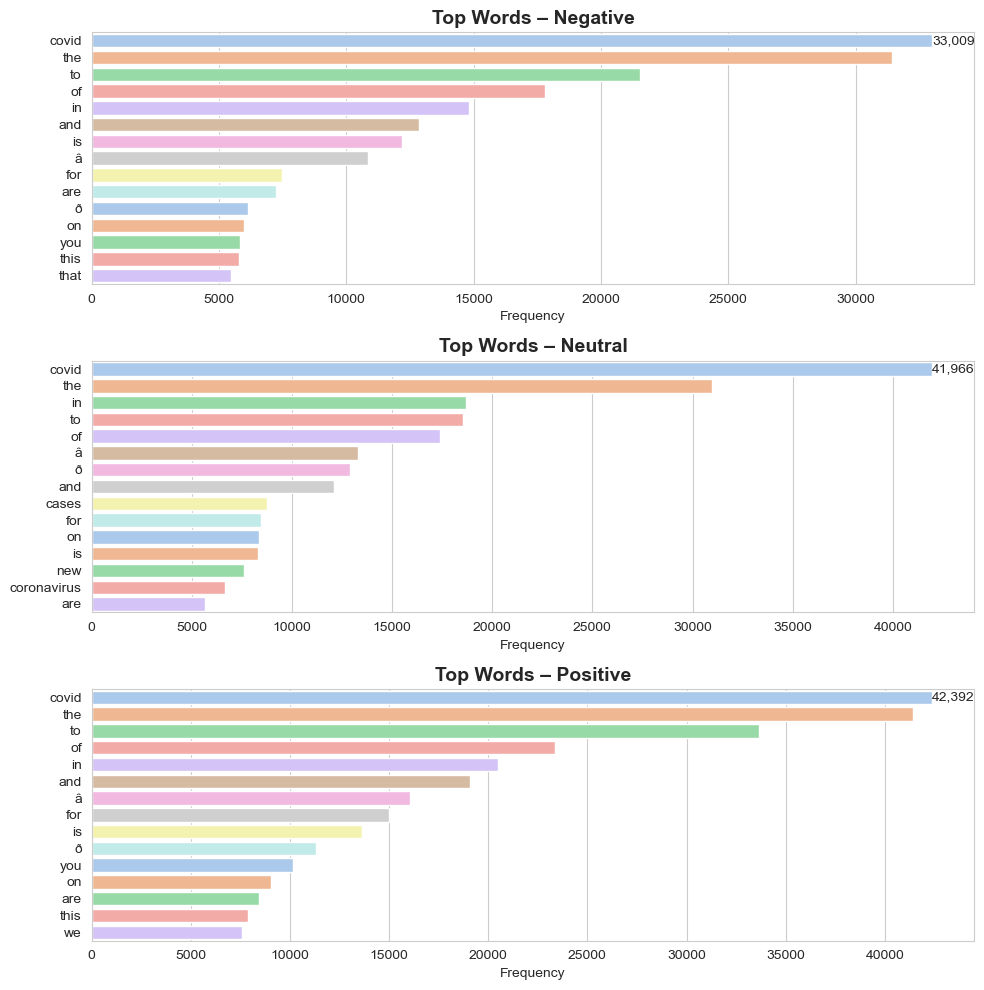

In [205]:

sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
sentiments = ["negative", "neutral", "positive"]
for i, sentiment in enumerate(sentiments):
    subset = df_clean[df_clean["sentiment"] == sentiment]
    words = " ".join(subset["processed_tweet"]).split()
    top_words = Counter(words).most_common(15)
    top_df = pd.DataFrame(top_words, columns=["word", "count"])
    sns.barplot(data=top_df,x="count",y="word",ax=axes[i],hue="word",palette="pastel")
    axes[i].set_title(f"Top Words – {sentiment.capitalize()}",fontsize=14,fontweight='bold')
    axes[i].bar_label(axes[i].containers[0], fmt='{:,.0f}')
    axes[i].set_xlabel("Frequency")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">

**Summary**: Sentiment classification measures emotional tone, not topic polarity. While COVID is generally associated with negative events, tweets may express positive outcomes such as recovery, vaccine success, or gratitude toward healthcare workers.

</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Model Evaluation</h3>
</div>

In [141]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_clean['processed_tweet'])
y = df_clean['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [178]:
def model_evaluation(model_name,y_test,y_pred):
    
    class_names = ["Negative", "Neutral", "Positive"]
    cm = confusion_matrix(y_test, y_pred)  

    sns.heatmap(cm,annot=False,cmap="Blues",xticklabels=[f"Predicted {c}" for c in class_names],yticklabels=[f"Actual {c}" for c in class_names])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j + 0.5,i + 0.5,f"{cm[i, j]:,}",ha='center',va='center',fontsize=11,fontweight='bold',color='darkblue')

    plt.title("Confusion Matrix using "+model_name)
    plt.show()

    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).T
    # Rename rows for clarity
    report_df.rename(index={'0': 'Died (0)','1': 'Survived (1)','macro avg': 'Macro Avg','weighted avg': 'Weighted Avg'}, inplace=True)    
    accuracy = report_df.loc['accuracy', 'precision']
    report_df = report_df.drop(index='accuracy')
    report_df = report_df.round(3)
    
    # Style it
    styled_report = (report_df.style
        .format({
            "precision": "{:.2f}",
            "recall": "{:.2f}",
            "f1-score": "{:.2f}",
            "support": "{:.0f}"
        })
        .background_gradient(cmap="Blues", subset=["precision", "recall", "f1-score"])
        .set_caption(" Classification Report")
    )
    
    display(styled_report)    
    display(Markdown(f"### 🎯 Overall Accuracy: **{accuracy:.2%}**\n"))

In [179]:
def run_model(model_name, df=df_clean, y=y, random_state=42, drop_first=True,eval=False):
    base_models = {
        "SVM": LinearSVC(C=1.0,random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=2000,solver="lbfgs", random_state=42),
    }

    model = base_models[model_name]
    model.fit(X_train, y_train)
    
    print(f"{model_name} model trained successfully.")
    print("Making predictions on the test set...")   

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    if eval:
        model_evaluation(model_name,y_test,y_pred) 
    else:
        print(f"{model_name} Accuracy: {acc:.4f}")
    return acc

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Model Evaluation : Logistic Regression</h3>
</div>

Logistic Regression model trained successfully.
Making predictions on the test set...


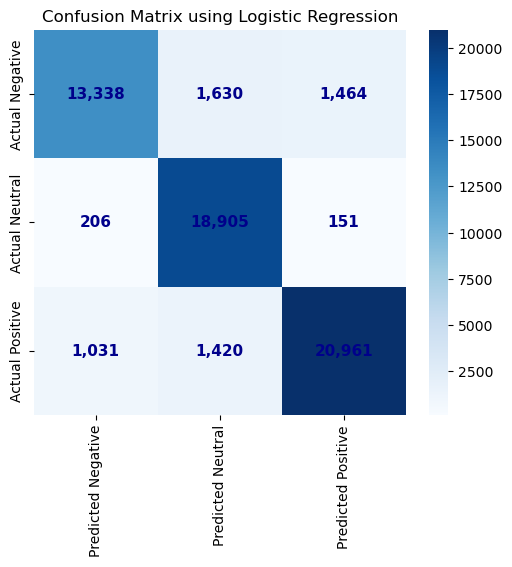

,precision,recall,f1-score,support
negative,0.92,0.81,0.86,16432
neutral,0.86,0.98,0.92,19262
positive,0.93,0.90,0.91,23412
Macro Avg,0.90,0.90,0.90,59106
Weighted Avg,0.90,0.90,0.90,59106


### 🎯 Overall Accuracy: **90.01%**


In [172]:
log_reg = run_model("Logistic Regression",eval=True)

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
<h1> 📊 Model Performance Summary – Logistic Regression (Sentiment Classification)</h1>

### 🎯 Overall Performance
- **Accuracy:** **90.01%**
- **Macro F1-score:** **0.90**
- **Weighted F1-score:** **0.90**

The model demonstrates strong and well-balanced performance across all three sentiment classes.

---


### 📌 Class-Level Performance
| Sentiment | Precision | Recall | F1-Score | Interpretation |
|------------|------------|--------|----------|----------------|
| 🔴 **Negative** | 0.92 | 0.81 | 0.86 | High precision, but lower recall indicates some negative tweets are misclassified as neutral. |
| ⚪ **Neutral** | 0.86 | 0.98 | 0.92 | Highest recall; captures nearly all neutral tweets but slightly over-predicts neutral. |
| 🟢 **Positive** | 0.93 | 0.90 | 0.91 | Strong and balanced performance with minimal misclassification. |

---

### 🔎 Confusion Matrix Insights

- Most predictions fall correctly along the diagonal, indicating strong classification performance.
- The primary confusion occurs between:
  - **Negative → Neutral**
  - **Positive → Neutral**
- Neutral acts as a boundary class between positive and negative sentiment.

---

##$ 🧠 Interpretation

- The model effectively captures strong sentiment signals (positive and negative).
- Neutral sentiment is easiest for the model to identify.
- Minor boundary ambiguity exists between adjacent sentiment classes.
- Overall, the model generalizes well with balanced performance across classes.

---

##$ 🎤 Summary Statement

The Logistic Regression model achieved **90% overall accuracy** with strong macro and weighted F1-scores, indicating balanced performance across negative, neutral, and positive sentiment classes. The primary classification challenge lies in distinguishing neutral sentiment from mild positive or negative expressions.
</div>


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Model Evaluation : Linear SVM</h3>
</div>

SVM model trained successfully.
Making predictions on the test set...


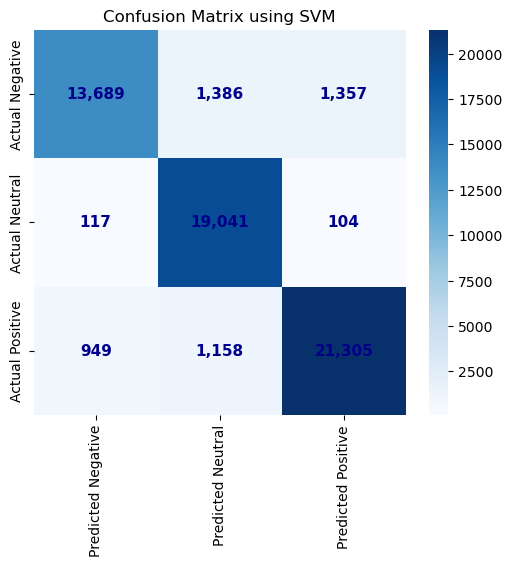

,precision,recall,f1-score,support
negative,0.93,0.83,0.88,16432
neutral,0.88,0.99,0.93,19262
positive,0.94,0.91,0.92,23412
Macro Avg,0.92,0.91,0.91,59106
Weighted Avg,0.92,0.91,0.91,59106


### 🎯 Overall Accuracy: **91.42%**


In [169]:
svm = run_model("SVM",eval=True)

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
<h1> 📊 Model Performance Summary – Support Vector Machine (Sentiment Classification)</h1>

#### 🎯 Overall Performance
- **Accuracy:** **91.42%**
- **Macro F1-score:** **0.91**
- **Weighted F1-score:** **0.91**

The SVM model slightly outperforms Logistic Regression, showing improved precision and recall across all sentiment classes.

---

#### 📌 Class-Level Performance

| Sentiment | Precision | Recall | F1-Score | Interpretation |
|------------|------------|--------|----------|----------------|
| 🔴 **Negative** | 0.93 | 0.83 | 0.88 | Improved recall compared to Logistic Regression, reducing misclassification into neutral. |
| ⚪ **Neutral** | 0.88 | 0.99 | 0.93 | Extremely high recall; almost all neutral tweets correctly identified. Slight over-classification of neutral remains. |
| 🟢 **Positive** | 0.94 | 0.91 | 0.92 | Strongest performing class with balanced precision and recall. |

---

#### 🔎 Confusion Matrix Insights

- Diagonal dominance indicates strong classification performance.
- Reduced confusion between:
  - **Negative → Neutral**
  - **Positive → Neutral**
- SVM handles sentiment boundaries slightly better than Logistic Regression.

---

#### 🧠 Interpretation

- SVM demonstrates better generalization and separation between classes.
- Precision and recall improved across all sentiment categories.
- Neutral sentiment remains the easiest to classify.
- Overall performance improvement of ~1.4% over Logistic Regression.

---

#### 🎤 Summary Statement

The Support Vector Machine model achieved **91.42% overall accuracy**, outperforming Logistic Regression. It provides stronger class separation and improved recall, particularly for negative and positive sentiment, making it the best-performing classical model in this analysis.
</div>


# 📊 Final Model Evaluation Summary – Sentiment Classification

## 🎯 Overall Performance Comparison

| Model | Accuracy | Macro F1 | Weighted F1 |
|--------|----------|-----------|-------------|
| Logistic Regression | 90.01% | 0.90 | 0.90 |
| Support Vector Machine (SVM) | **91.42%** | **0.91** | **0.91** |

The Support Vector Machine (SVM) outperformed Logistic Regression, achieving higher overall accuracy and improved class-level balance.

---

## 📌 Key Observations

- Both models demonstrate strong performance across negative, neutral, and positive sentiment classes.
- SVM shows improved recall and F1-score, particularly for negative and positive sentiment.
- Neutral sentiment remains the easiest class to classify for both models.
- Most misclassifications occur at sentiment boundaries:
  - Negative ↔ Neutral
  - Positive ↔ Neutral

---

## 🔎 Model Strengths

### Logistic Regression
- Strong baseline model
- Fast and interpretable
- Balanced performance across classes
- Achieved 90% accuracy

### Support Vector Machine (SVM)
- Better margin separation between classes
- Reduced confusion across sentiment boundaries
- Highest overall performance at 91.42% accuracy
- Best-performing classical model in this analysis

---

## 🧠 Interpretation

The results indicate that linear models perform very well on TF-IDF features due to the high-dimensional, sparse nature of text data.  
SVM provides slightly stronger class separation than Logistic Regression, leading to improved generalization and performance.

---

## 🏆 Final Conclusion

Both models achieved strong performance, but **SVM delivered the best overall results** with 91.42% accuracy and improved F1-scores across sentiment classes.  

Given the balance of performance and computational efficiency, SVM is selected as the final model for sentiment classification in this analysis.